In [2]:
!ls "nsddata/nsddata/ppdata/subj01/func1pt8mm/roi/"

HCP_MMP1.nii.gz		lh.floc-faces.nii.gz	  rh.MTL.nii.gz
Kastner2015.nii.gz	lh.floc-places.nii.gz	  rh.corticalsulc.nii.gz
MTL.nii.gz		lh.floc-words.nii.gz	  rh.floc-bodies.nii.gz
corticalsulc.nii.gz	lh.nsdgeneral.nii.gz	  rh.floc-faces.nii.gz
floc-bodies.nii.gz	lh.prf-eccrois.nii.gz	  rh.floc-places.nii.gz
floc-faces.nii.gz	lh.prf-visualrois.nii.gz  rh.floc-words.nii.gz
floc-places.nii.gz	lh.streams.nii.gz	  rh.nsdgeneral.nii.gz
floc-words.nii.gz	lh.thalamus.nii.gz	  rh.prf-eccrois.nii.gz
lh.HCP_MMP1.nii.gz	nsdgeneral.nii.gz	  rh.prf-visualrois.nii.gz
lh.Kastner2015.nii.gz	prf-eccrois.nii.gz	  rh.streams.nii.gz
lh.MTL.nii.gz		prf-visualrois.nii.gz	  rh.thalamus.nii.gz
lh.corticalsulc.nii.gz	rh.HCP_MMP1.nii.gz	  streams.nii.gz
lh.floc-bodies.nii.gz	rh.Kastner2015.nii.gz	  thalamus.nii.gz


In [17]:
import nibabel
from numpy import unique
base_path = "nsddata/nsddata/ppdata/subj01/func1pt8mm/roi/"
explore_roi = "nsdgeneral.nii.gz"
real_path = base_path + explore_roi
roi_np = nibabel.load(real_path, mmap=True).get_fdata()
unique(roi_np)

array([-1.,  0.,  1.])

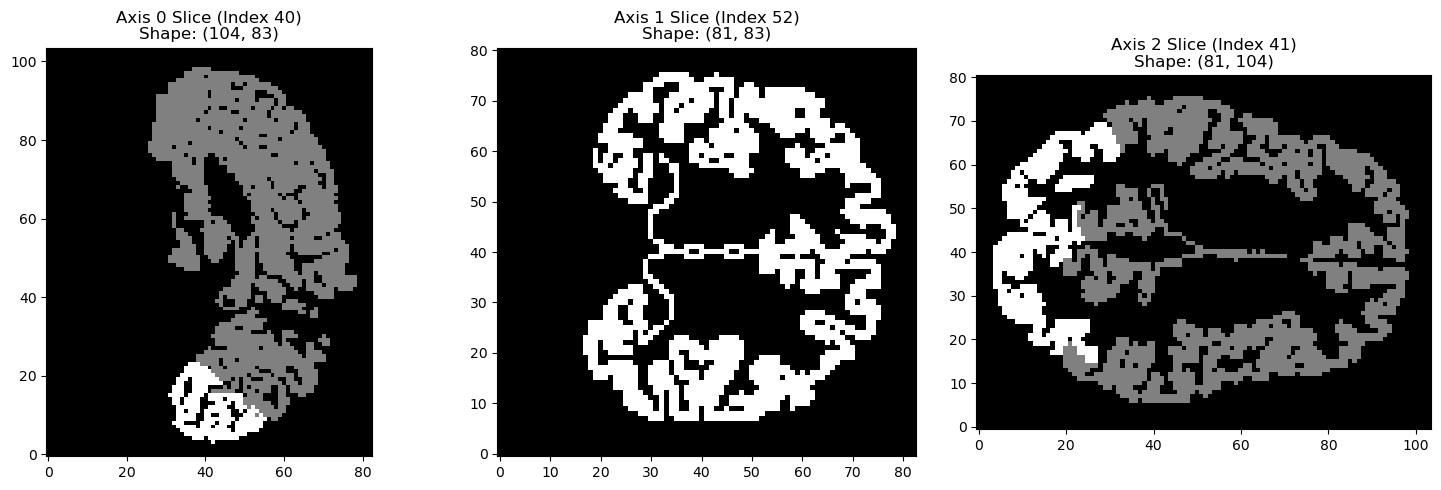

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shape
shape = roi_np.shape

# --- Define the middle slice indices for each axis ---
slice_idx_0 = shape[0] // 2  # 40
slice_idx_1 = shape[1] // 2  # 52
slice_idx_2 = shape[2] // 2  # 41

# --- Select the three different cross-sections ---
slice_0 = roi_np[slice_idx_0, :, :] # Axial/Transverse
slice_1 = roi_np[:, slice_idx_1, :] # Coronal
slice_2 = roi_np[:, :, slice_idx_2] # Sagittal

# --- Plotting the three cross-sections ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Axial (Axis 0 slice)
axes[0].imshow(slice_0, cmap='gray', origin='lower')
axes[0].set_title(f'Axis 0 Slice (Index {slice_idx_0})\nShape: {slice_0.shape}')

# Plot 2: Coronal (Axis 1 slice)
axes[1].imshow(slice_1, cmap='gray', origin='lower')
axes[1].set_title(f'Axis 1 Slice (Index {slice_idx_1})\nShape: {slice_1.shape}')

# Plot 3: Sagittal (Axis 2 slice)
axes[2].imshow(slice_2, cmap='gray', origin='lower')
axes[2].set_title(f'Axis 2 Slice (Index {slice_idx_2})\nShape: {slice_2.shape}')

plt.tight_layout()
plt.savefig('3_cross_section_plots.png')